<a href="https://colab.research.google.com/github/sudeep-009/Car-Dekho-Regression-Analysis/blob/dev/Copy_of_Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
car_dekho_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Self Project/Car Dekho/CAR DETAILS FROM CAR DEKHO.csv')

In [14]:
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


##**Exploratory Data Analysis**



**Number of features and records present in the dataset**

In [16]:
print('Number of features present in the dataset is {}'.format(car_dekho_df.shape[1]))
print('Number of records present in the dataset is {}'.format(car_dekho_df.shape[0]))

Number of features present in the dataset is 8
Number of records present in the dataset is 4340


**Feature Names and data-type present in the dataset**

In [20]:
car_dekho_df.dtypes


name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

**Null Values present in the dataset**

In [21]:
car_dekho_df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**Finding:**No null value is present in the dataset

**Duplicate values present in the dataset**

In [22]:
print('Number of duplicate values present in the dataset is {}'.format(len(car_dekho_df[car_dekho_df.duplicated()])))

Number of duplicate values present in the dataset is 763


**Dropping the duplicated value present in the dataset**

In [23]:
car_dekho_df.drop_duplicates(inplace=True,keep='first')

**Checking the unique values present in the categorical dataset**

In [30]:
from pandas.core.dtypes.dtypes import CategoricalDtype
categorical_var = [i for i in car_dekho_df.columns if car_dekho_df[i].dtypes == object ]
for i in categorical_var:
  print(i.upper())
  print(car_dekho_df[i].unique())
  print('---------------------------------')

NAME
['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
---------------------------------
FUEL
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
---------------------------------
SELLER_TYPE
['Individual' 'Dealer' 'Trustmark Dealer']
---------------------------------
TRANSMISSION
['Manual' 'Automatic']
---------------------------------
OWNER
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
---------------------------------


**Distribution Plotter Function**

In [37]:
def distplotter(x):
  sns.set_theme(style='whitegrid',rc={'figure.figsize': (8,6)},palette='muted')
  sns.distplot(x)
  plt.grid(False)

**BoxPlot Function**

**Distribution of Target Variable i.e Selling Price**

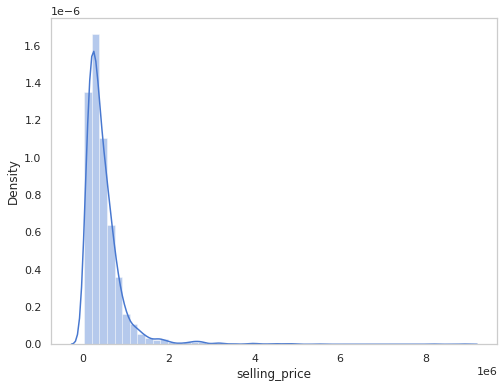

In [34]:
distplotter(car_dekho_df['selling_price'])

**Finding:** Dataset is positively skewed and hence we will make log transformation to make normal.

In [35]:
car_dekho_df['selling_price'] = np.log10(car_dekho_df['selling_price'])

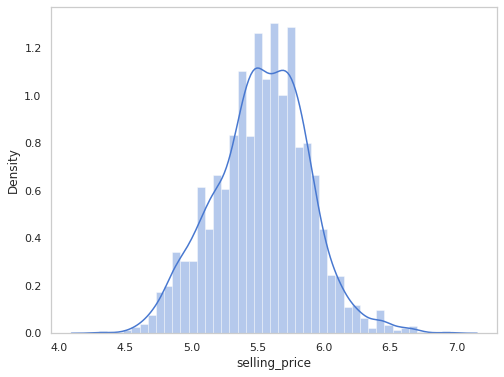

In [38]:
distplotter(car_dekho_df['selling_price'])

**Checking for outliers in the target variable**

**Distribution of Numerical Predictor Variables**

Numerical Predictor Variables:
1. km_driven

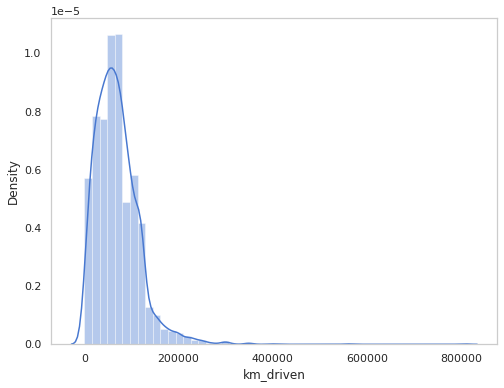

In [39]:
distplotter(car_dekho_df['km_driven'])

**Finding:**It is slightly positively skewed and hence required sqrt transformation.

In [40]:
car_dekho_df['km_driven'] = np.sqrt(car_dekho_df['km_driven'])

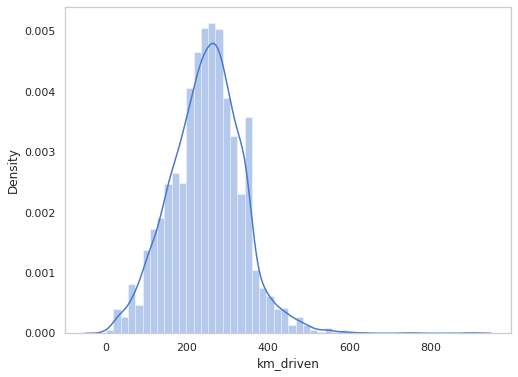

In [41]:
distplotter(car_dekho_df['km_driven'])